In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 

from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA 

In [2]:
df = sb.load_dataset("iris") 
print(df.head()) 
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
Xdf = df.drop("species",axis=1)
Ydf = df["species"]

In [29]:
ss = StandardScaler() 
X = ss.fit_transform(Xdf) 
Y = Ydf.values 
n = X.shape[0]

In [30]:
cov = ( X.T @ X )/n
print(cov)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [34]:
eigValues, eigVectors = np.linalg.eig(cov)
pValues = eigValues[0:2]
pComp = eigVectors[:,0:2]

In [38]:
Xproj = X @ pComp
projDf = pd.DataFrame(Xproj, columns=["x1","x2"])
projDf["labels"]=Y

<Axes: xlabel='x2', ylabel='x1'>

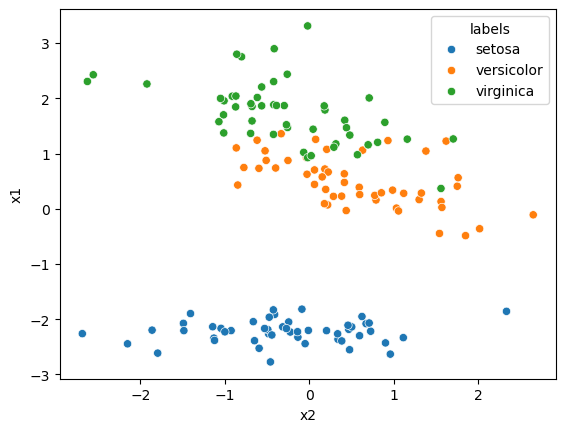

In [40]:
sb.scatterplot(data=projDf,x="x2",y="x1",hue="labels")

<Axes: xlabel='x2', ylabel='x1'>

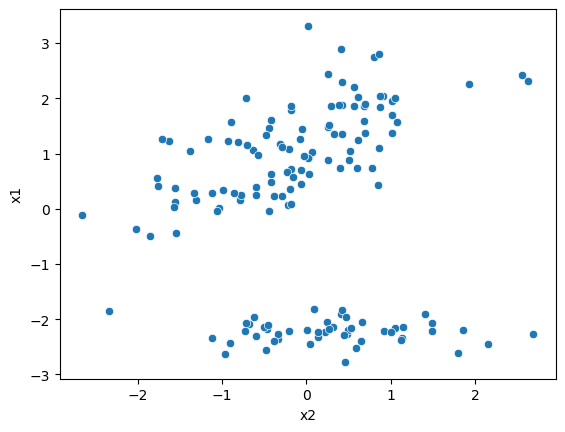

In [42]:
pca = PCA(n_components=2) 
Xlib = pca.fit_transform(Xdf)
# print(Xlib)

sb.scatterplot(data=pd.DataFrame(Xlib, columns=["x1","x2"]),x="x2",y="x1")